In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.sample(10, random_state=2024)  #reproducibilidad 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [65]:
# Verificar si hay duplicados
df = df.drop_duplicates()
df.shape

(891, 12)

In [66]:
# Columnas irrelevantes para el análisis
df["PassengerId"].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [67]:
df["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [68]:
df["Ticket"].value_counts(dropna=False)

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [69]:
# Passengerid, name, ticket vamos a eliminar Transformar data previo
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1) # ¿por qué axis 1?

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [71]:
# df[["Age", "Survived"]][df["Age"].isna()]["Survived"].sum()
df[df["Age"].isna()]["Survived"].sum()

np.int64(52)

In [72]:
# Ahora hay que transformar lo que falta
# Tenemos datos numéricos, Categorías (texto), Texto
# Survived es categórico porque no tiene sentido hacer la desviación estándar, etc
# Pclass también es categórico
# Tomar las columnas y aplicar las transformaciones en base al análisis que quiero hacer
# Transformar datos categóricos

df["Survived"] = pd.Categorical(df["Survived"])
df["Pclass"] = pd.Categorical(df["Pclass"])
df["Sex"] = pd.Categorical(df["Sex"])
df["Embarked"] = pd.Categorical(df["Embarked"])
# df["Age"] = df["Age"].fillna(-1).astype(np.int16, errors="ignore") # fill na para cambiar el na por -1

In [55]:
df[df["Age"]== -1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,-1,0,0,8.4583,Q
17,1,2,male,-1,0,0,13.0000,S
19,1,3,female,-1,0,0,7.2250,C
26,0,3,male,-1,0,0,7.2250,C
28,1,3,female,-1,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,-1,0,0,7.2292,C
863,0,3,female,-1,8,2,69.5500,S
868,0,3,male,-1,0,0,9.5000,S
878,0,3,male,-1,0,0,7.8958,S


In [56]:
df["Age"] = df["Age"].apply(lambda x: x if x >= 0 else np.nan)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [74]:
# Ya está todo transformado excepto Age
df.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [75]:
# Si la desviación estándar es mucho mayor que la media quiere decir que tenemos datos muy dispersos
df.describe(include="category").T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Sex,891,2,male,577
Embarked,889,3,S,644


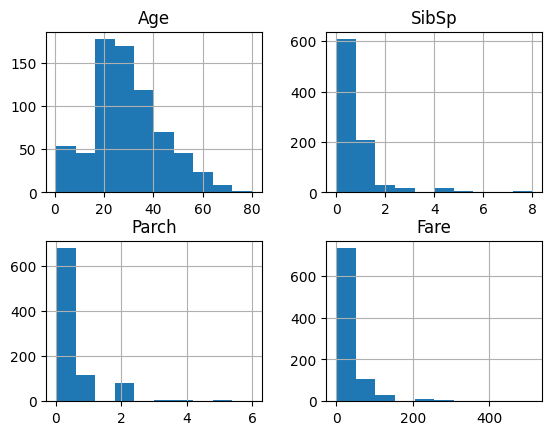

In [76]:
# Análisis univariado columna por columna de números y de categorías, en este caso variables numéricas
df.select_dtypes(include=np.number).hist()
plt.show()


<Axes: xlabel='Fare'>

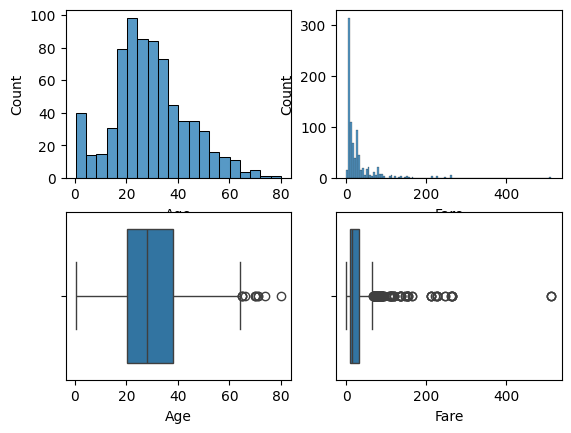

In [77]:
# Edad y Fare
fig, axis = plt.subplots(2,2)
sns.histplot(ax= axis[0,0], data=df, x="Age")
sns.boxplot(ax=axis[1,0], data=df, x="Age")
sns.histplot(ax= axis[0,1], data=df, x="Fare")
sns.boxplot(ax=axis[1,1], data=df, x="Fare")

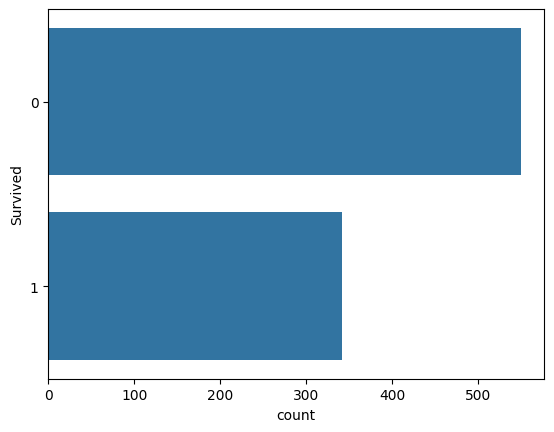

In [28]:
# Análisis univariado categórico
sns.countplot(data=df, y="Survived")
plt.show()

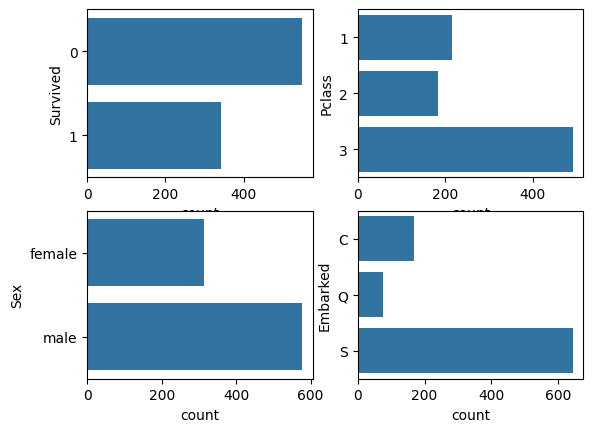

In [78]:
fig, axis = plt.subplots(2,2)
sns.countplot(ax= axis[0,0], data=df, y="Survived")
sns.countplot(ax= axis[0,1], data=df, y="Pclass")
sns.countplot(ax= axis[1,0], data=df, y="Sex")
sns.countplot(ax= axis[1,1], data=df, y="Embarked")

plt.show()

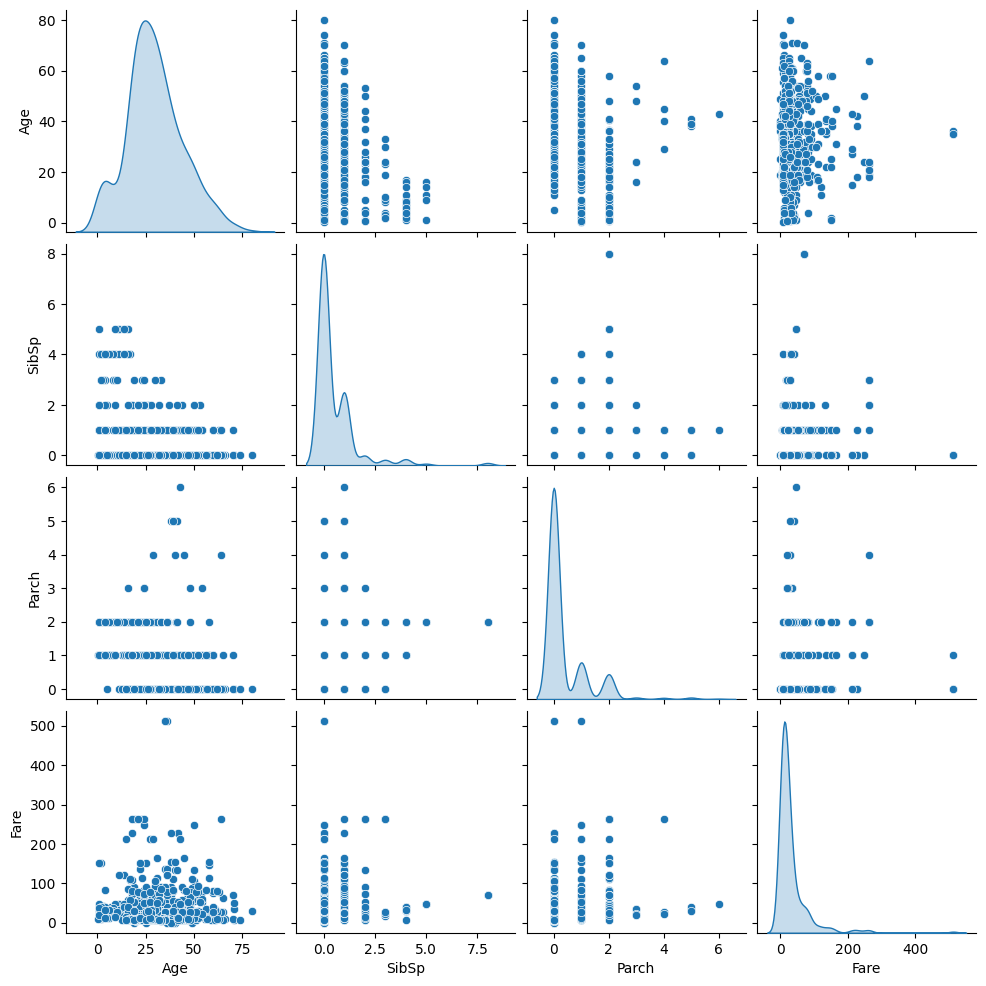

In [79]:
# Análisis bivariado numérico vs numérico, categórico vs categórico, numérico vs categórico
sns.pairplot(data= df.select_dtypes(include=np.number), diag_kind="kde")
plt.show()

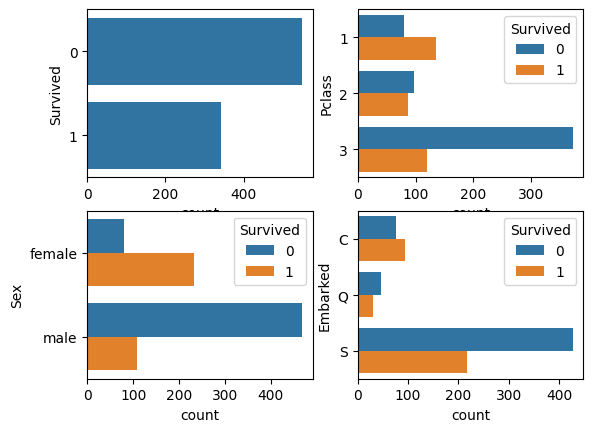

In [81]:
# Análisis bivariado categórico vs categórico
# Necesito una variable de control Survived vs Sex y Embarked vs Survived
fig, axis = plt.subplots(2,2)
sns.countplot(ax= axis[0,0], data=df, y="Survived")
sns.countplot(ax= axis[0,1], data=df, y="Pclass", hue="Survived")
sns.countplot(ax= axis[1,0], data=df, y="Sex", hue="Survived")
sns.countplot(ax= axis[1,1], data=df, y="Embarked", hue="Survived")

plt.show()

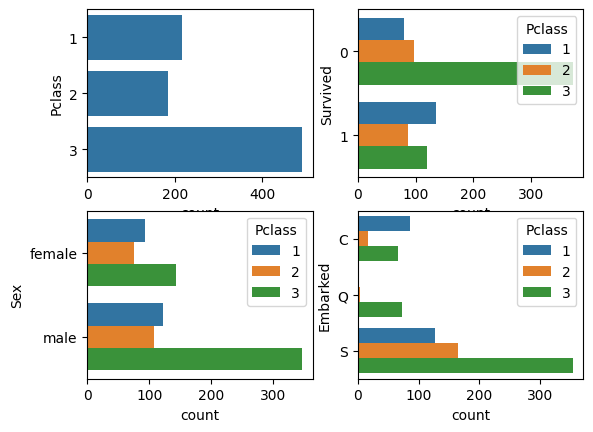

In [32]:
# Valor de control clase

fig, axis = plt.subplots(2,2)
sns.countplot(ax= axis[0,0], data=df, y="Pclass")
sns.countplot(ax= axis[0,1], data=df, y="Survived", hue="Pclass")
sns.countplot(ax= axis[1,0], data=df, y="Sex", hue="Pclass")
sns.countplot(ax= axis[1,1], data=df, y="Embarked", hue="Pclass")

plt.show()

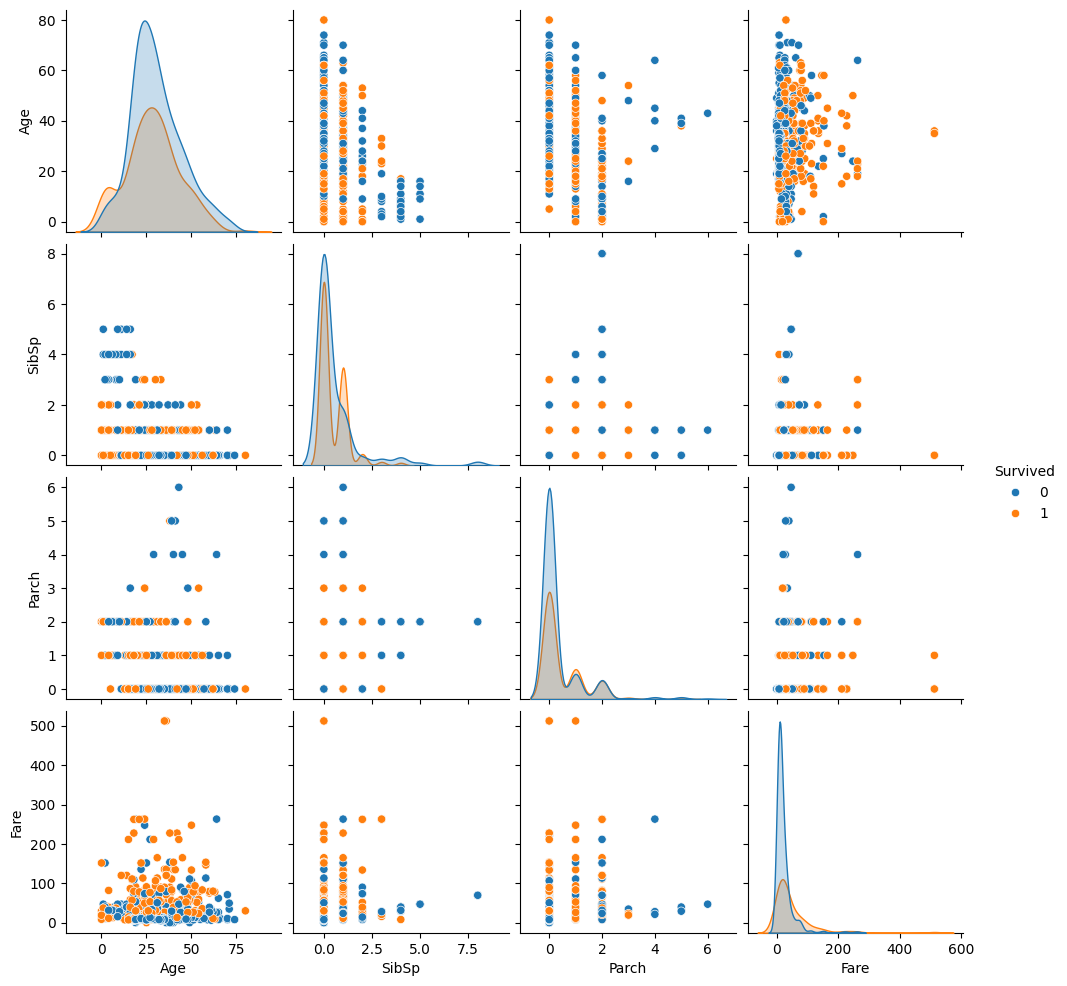

In [33]:
# Análisis bivariado numérico vs categórico

sns.pairplot(data= df, hue="Survived", diag_kind="kde")
plt.show()


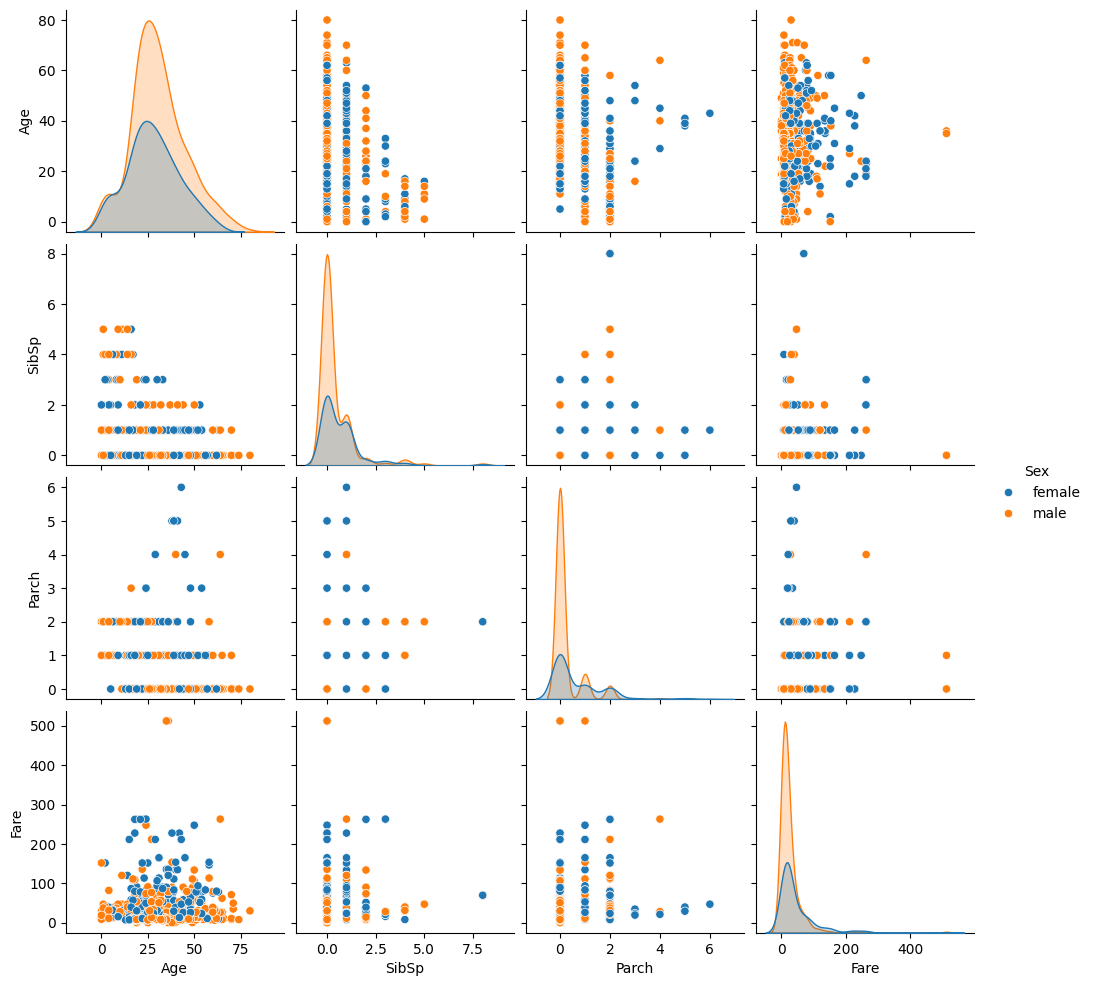

In [34]:
sns.pairplot(data= df, hue="Sex", diag_kind="kde")
plt.show()


In [35]:
df.select_dtypes(include=np.number).corr()  #Mide la correlación linear Pearson -1 a 1 Cuando una se acerca a 1 es una
# relación lineal positiva 
# cuando se acerca a -1 es una relación lineal negativa
# Cuando tiende a 0 es que no es relación lineal 



,Age,SibSp,Parch,Fare
Age,1.000000,-0.307947,-0.189307,0.096288
SibSp,-0.307947,1.000000,0.414838,0.159651
Parch,-0.189307,0.414838,1.000000,0.216225
Fare,0.096288,0.159651,0.216225,1.000000


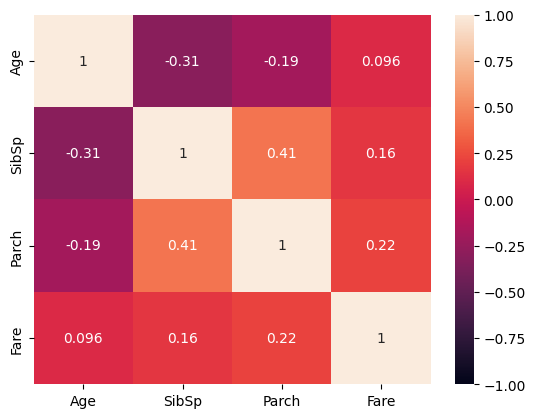

In [36]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [37]:
# EDA para primer algoritmo de Machine Learning
# Dado el sexo, la edad, el ticket que pagó y el lugar donde se embarcó  ¿cuál hubiera sido el resultado
# Sobrevivir o no sobrevivir
# Columna objetivo Survived



In [38]:
# Algoritmo De Clasificación porque vamos a ver etiquetas.... si buscáramos un número sería 
# Algoritmo de Regresión
# Sobrevivió, no sobrevivió

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
#logistic regresion
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#Fundiones de imputación
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [105]:
# Dividir data set en dos bloques #normalmente la parte de aprendizaje es el 75 por ciento de los datos
# Y el bloque de testeo 25
df["Sex"] = df["Sex"].apply(lambda x: 0 if x=="female" else 1)
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df["Embarked"] = pd.Categorical(df["Embarked"])
df_train, df_test = train_test_split(df, random_state=2024, test_size=0.20)

In [106]:
# Display permite mostrar varias tablas
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 618 to 648
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    category
 1   Pclass    712 non-null    category
 2   Sex       712 non-null    category
 3   Age       569 non-null    float64 
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Fare      712 non-null    float64 
 7   Embarked  712 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.1 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 829 to 161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  179 non-null    category
 1   Pclass    179 non-null    category
 2   Sex       179 non-null    category
 3   Age       145 non-null    float64 
 4   SibSp     179 non-null    int64   
 5   Parch     179 non-null    int64   
 6   Fare      179 non-null    float64 
 7   Embarked  177 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 8.2 KB


None

In [107]:
display(df_train.sample(6))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
391,1,3,1,21.0,0,0,7.7958,2
816,0,3,0,23.0,0,0,7.9250,2
52,1,1,0,49.0,1,0,76.7292,0
768,0,3,1,NaN,1,0,24.1500,1
820,1,1,0,52.0,1,1,93.5000,2
289,1,3,0,22.0,0,0,7.7500,1


In [120]:
# Si tengo más de 1000 datos pongo más datos para el aprendizaje
# Funciones para hacer la imputación, que es nuestra necesidad de poder cubrir los valores na del Age
# nuestro algoritmo de ml solo puede procesar números por lo que tenemos que homogenizar los datos
cat_cols = df_train.drop("Survived", axis=1).select_dtypes(include="category").columns # Corregido selectdtype
num_cols = df_train.drop("Survived", axis=1).select_dtypes(include="number").columns
cat_transformer = Pipeline(
    steps = [
        ("Impute", SimpleImputer(strategy="most_frequent")),
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'))
    ]
)
num_transformer = Pipeline(
    steps = [
        ("Num_Impute", SimpleImputer(strategy="mean"))
    ]
)

pre_proceso = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols), 
    ("cat", cat_transformer, cat_cols)
])

encode = Pipeline(
    steps = [
       ("preprocesor", pre_proceso) 
    ]
)

In [102]:
num_cols

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [121]:
df_train["Survived"].apply(lambda x: 1 if x == 1 else 0)

618    1
434    0
803    1
218    1
509    1
      ..
539    1
640    0
608    1
506    1
648    0
Name: Survived, Length: 712, dtype: category
Categories (2, int64): [0, 1]

In [117]:
df_train["Survived"]

618    1
434    0
803    1
218    1
509    1
      ..
539    1
640    0
608    1
506    1
648    0
Name: Survived, Length: 712, dtype: category
Categories (2, int64): [0, 1]

In [122]:
clf = Pipeline(
    steps= [
        ("preprocesor", pre_proceso),
        ("classifier", LogisticRegression())
    ]

)

clf.fit(df_train.drop("Survived", axis=1), df_train["Survived"].apply(lambda x: 1 if x == 1 else 0))

/workspaces/titanic/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Num_Impute',
                                                                   SimpleImputer())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Pclass', 'Sex', 'Embarked'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [128]:
y_pred = clf.predict(df_test.drop("Survived", axis=1))


/workspaces/titanic/.venv/lib/python3.12/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/workspaces/titanic/.venv/lib/python3.12/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [129]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1])

In [130]:
# Comparar el resultado vs la verdad
accuracy_score(y_pred, df_test["Survived"])

0.8156424581005587